In [ ]:
Jalen Buffert Section C 

DS 256 Data Science Programming, Fall 2024

Prof Eatai Roth

## Problem Set 5
Due 11/14/2024 by 8p

## Titanic Pandas
(sounds cute...is not)

In this assignment, we'll explore the titanic training data set. These data represent a portion of the passenger manifest of the Titanic, detailing the passengers and whether or not they survived the fateful crash.

The columns are mostly self-explanatory. Key to less-obvious columns:
 - Sex - male=1 / female=0 
 - Parch - number of parents/children traveling with
 - SibSp - numbers of siblings/spouses traveling with
 - PClass - ticket class (like first class, business, economy)


 To start, you should import packages, ```pandas``` (as pd) and ```matplotlib.pyplot``` (as plt). Then load the data from ```titanic_train_clean.csv``` into a pandas dataframe.

 Feel free to add more code blocks if needed. When making figures, don't forget to label axes and provide titles and legends when appropriate.

In [143]:
import pandas as pd
import matplotlib.pyplot as plt

tt_df = pd.read_csv("/Users/jalenbuffert/Documents/DS GitHub/titanic.csv")

tt_df





,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Title,Family_Size
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,1,1,0,A/5 21171,Mr,1
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,0,1,1,PC 17599,Mrs,1
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,0,0,1,STON/O2. 3101282,Miss,0
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,0,1,1,113803,Mrs,1
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,1,0,0,373450,Mr,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,27.0,NaN,S,13.0000,"Montvila, Rev. Juozas",0,887,2,1,0,0,211536,Rev,0
887,19.0,B42,S,30.0000,"Graham, Miss. Margaret Edith",0,888,1,0,0,1,112053,Miss,0
888,22.0,NaN,S,23.4500,"Johnston, Miss. Catherine Helen ""Carrie""",2,889,3,0,1,0,W./C. 6607,Miss,3
889,26.0,C148,C,30.0000,"Behr, Mr. Karl Howell",0,890,1,1,0,1,111369,Mr,0


In [33]:
tt_df

TypeError: 'DataFrame' object is not callable

## Homework Problems

For each of the problems, you'll write some code to find the answer. If there is a written/short answer component, use the provided text field.

### Problem 1

 - How many passengers are recorded in this log?
 - What percentage are male?
 - What percentage survived?

Hint: You can find these three answers with a single command.

In [145]:
total_passengers, percentage_male, pecentage_survived = len(tt_df), (tt_df['Sex'].mean())*100, (tt_df['Survived'].mean())*100
total_passengers, percentage_male, pecentage_survived

(891, 64.75869809203144, 38.38383838383838)

Your written answer:

 - 891
 - 64.758
 - 38.3838

### Problem 2:

 - What percentage of female passengers survived?
 - What percentage of male passengers survived?

In [147]:
gender_survival = tt_df.groupby('Sex')['Survived'].mean()*100
male_s = gender_survival.get(0,0)
female_s = gender_survival.get(1,0)
male_s, female_s

(74.20382165605095, 18.890814558058924)

Your written answer:

 - Males:74.20382165605095
 - Females: 18.890814558058924

### Problem 3

Use ```groupby``` and ```agg``` to find the percentage of the total tickets and the survivorship percentage for each class of ticket.

In [149]:
tickets_st = ( tt_df.groupby('Pclass').agg(ticket_perc = ('PassengerId', lambda x: len(x)/len(tt_df) *100), 
                                           survivor_perc = ('Survived','mean')))

tickets_st['survivor_perc'] *= 100
tickets_st

,ticket_perc,survivor_perc
Pclass,,
1,24.242424,62.962963
2,20.650954,47.282609
3,55.106622,24.236253


Your written answer:

 - Class 1 
    - 24.242424
    - 62.962963
- Class 2 
    - % tickets:20.650954	
    - % survivorship: 47.282609
- Class 3
    - % tickets:55.106622
    - % survivorship: 24.236253


### Problem 4

Create two new dataframes corresponding to survivors and non-survivors keeping only the columns: age, name, and sex. Display the first five rows of these new dataframes.

Create a figure showing the distribution of age by sex and survivorship (four histograms on the same axes: male-survivors, female-survivors, male-unlucky, female-unlucky). Choose colors and histtype (see the [documentation for histogram](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html)) to make this figure easy to read and interpret.

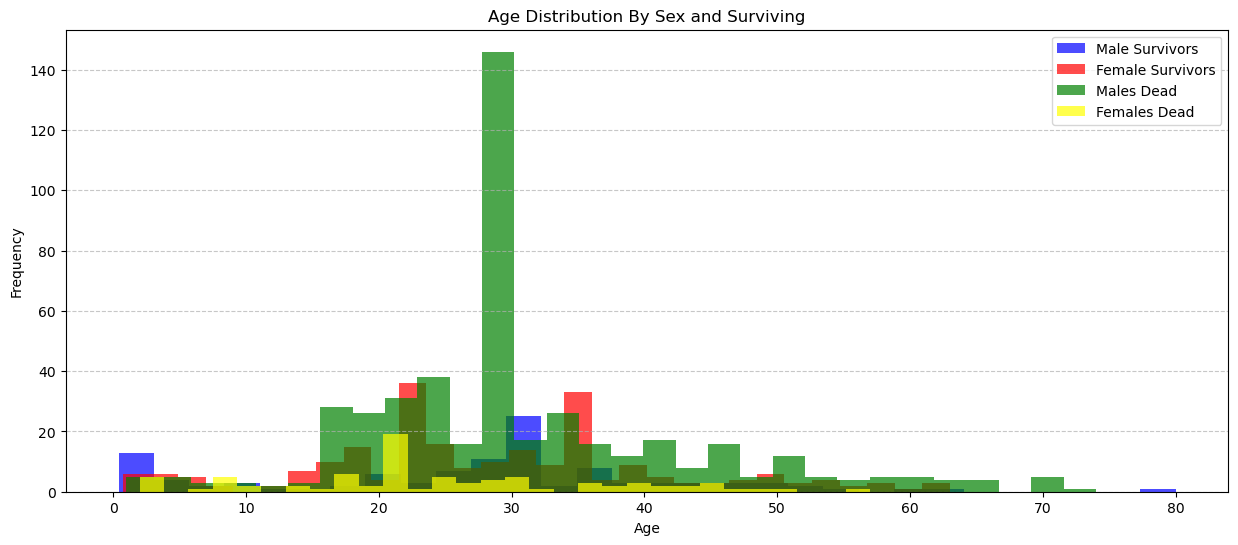

In [178]:
survivors_df = tt_df[tt_df['Survived'] == 1][['Age','Name','Sex']]
non_survivors_df =  tt_df[tt_df['Survived'] == 0][['Age','Name','Sex']]

male_s = survivors_df[survivors_df['Sex'] == 1]['Age']
female_s = survivors_df[survivors_df['Sex'] == 0]['Age']
male_d = non_survivors_df[non_survivors_df['Sex'] == 1]['Age']
female_d = non_survivors_df[non_survivors_df['Sex'] == 0]['Age']

plt.figure(figsize = (15,6))

plot_opts = dict(bins = 30, alpha = 0.7, histtype = 'stepfilled')

plt.hist(male_s, color = 'blue', label = 'Male Survivors', **plot_opts)
plt.hist(female_s, color = 'red', label = 'Female Survivors', **plot_opts)
plt.hist(male_d,  color = 'green', label = 'Males Dead', **plot_opts)
plt.hist(female_d, color = 'yellow', label = 'Females Dead', **plot_opts)

plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution By Sex and Surviving')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)



### Problem 5

Now that we've inspected the data, let's build a classifier (you'll compare two models) that predicts which passengers survived. These are the steps you should take:

 - Choose your features. The label will be survivorship.
 - Split the data into training and test sets.
 - Standardize the values using StandardScaler
 - Choose two of the following model types: KNN, SVM, Decision Tree. Create those models and select hyper-parameters.
 - Fit your models to the training data.
 - Apply the fit models to create predictions from the test data.
 - For each model, create a confusion matrix for the training and test data. You may want to revisit the hyper-parameters and re-fit the models.

 - Answer the questions at the bottom of the code block.

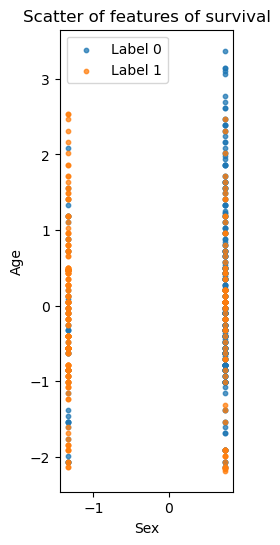

In [212]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

features = ['Sex','Age']
label = 'Survived'

X_train, X_test, y_train, y_test = train_test_split(tt_df[features], tt_df[label], test_size = 0.2)
#y_test

ss = StandardScaler()
ss.fit(X_train)

Xs_train = ss.transform(X_train)
Xs_test = ss.transform(X_test)

ys_train = y_train.values.ravel()
ys_test =  y_test.values.ravel()

fig, ax = plt.subplots(1,1, figsize=(8,6))

for label in [0,1]:
    idx = ys_train == label
    ax.scatter(Xs_train[idx,0],
               Xs_train[idx, 1],
               s = 10, alpha = 0.75, label=f'Label {label}')

ax.set_xlabel('Sex')
ax.set_ylabel('Age')
ax.set_title('Scatter of features of survival')
ax.set_aspect('equal')
ax.legend()

plt.show()



In [220]:
def plotDecisionBoundary(model, data = None, xy_lim = None, ax = None):

    import matplotlib.pyplot as plt
    import numpy as np
    
    if ax is None:
        fig, ax = plt.subplots(1,1, figsize = (5,5))
    else:
        fig = ax.get_figure()
    
    # Check if data or xy_lim is provided
    if data is None and xy_lim is None:
        raise ValueError('If data is None, xy_lim must be provided')
    elif xy_lim is not None:
        f0_min, f0_max, f1_min, f1_max = xy_lim[0][0], xy_lim[0][1], xy_lim[1][0], xy_lim[1][1]
    elif not data is None:
        X = data[0]
        y = data[1]
        f0_min, f0_max, f1_min, f1_max = min(X[:,0]), max(X[:,0]), min(X[:,1]), max(X[:,1])

    range0, range1 = f0_max-f0_min, f1_max-f1_min

    F0, F1 = np.meshgrid(np.linspace(f0_min-0.1*range0, f0_max+0.1*range0, 200), np.linspace(f1_min-0.1*range1, f1_max+0.1*range1, 200))
    F_grid = np.vstack([F0.ravel(), F1.ravel()]).transpose()

    labels = model.classes_
    label_nums = np.arange(len(labels))
    label_dict = dict(zip(labels, label_nums))

    y_grid = model.predict(F_grid)
    y_num_grid = np.array([label_dict[y_lab] for y_lab in y_grid]).reshape(F0.shape)

    cmap = plt.get_cmap('tab10', len(labels))
    ax.contourf(F0, F1, y_num_grid, cmap = cmap, alpha = 0.25)

    if not data is None:
        for label, label_num in zip(labels, label_nums):
            ax.scatter(X[y==label,0], X[y==label,1], label = label, s = 10, alpha = 0.75)
        ax.legend()
    plt.show()

    ax.set_xlabel('Feature 0')
    ax.set_ylabel('Feature 1')
    ax.set_aspect('equal')
    return fig, ax

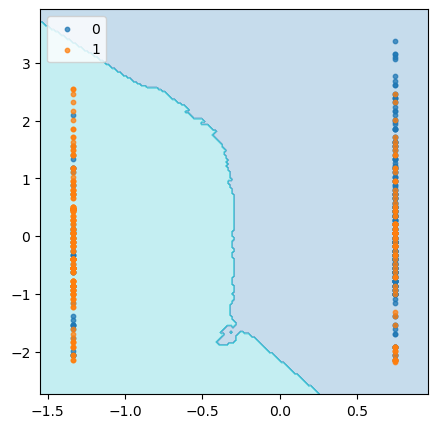

In [230]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier(n_neighbors = 51)
knn_clf.fit(Xs_train, ys_train)

fig, ax = plotDecisionBoundary(knn_clf, data = (Xs_train, ys_train))

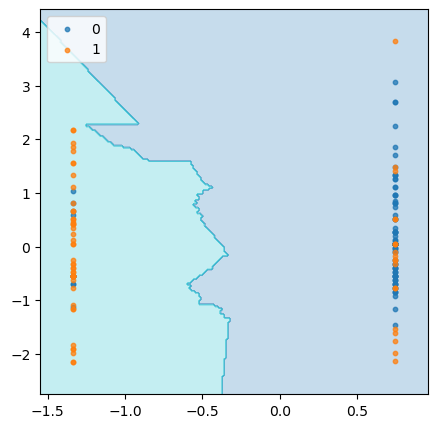

In [241]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier(n_neighbors = 51)
knn_clf.fit(Xs_test, ys_test)

fig, ax = plotDecisionBoundary(knn_clf, data = (Xs_test, ys_test))

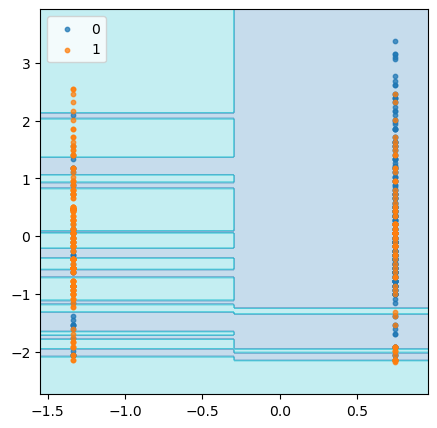

In [226]:
from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier(max_depth = 30)
tree_clf.fit(Xs_train, ys_train)

fig, ax = plotDecisionBoundary(tree_clf, data = (Xs_train, ys_train))

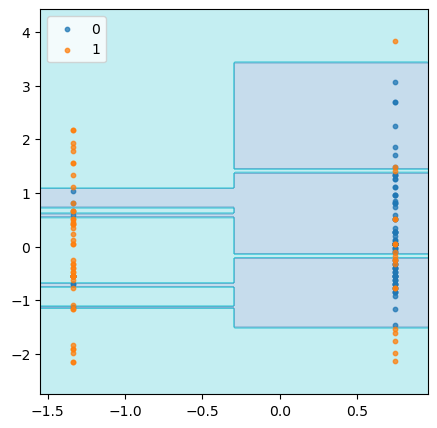

In [243]:
from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier(max_depth = 30)
tree_clf.fit(Xs_test, ys_test)

fig, ax = plotDecisionBoundary(tree_clf, data = (Xs_test, ys_test))

Text(0.5, 1.0, 'KNN')

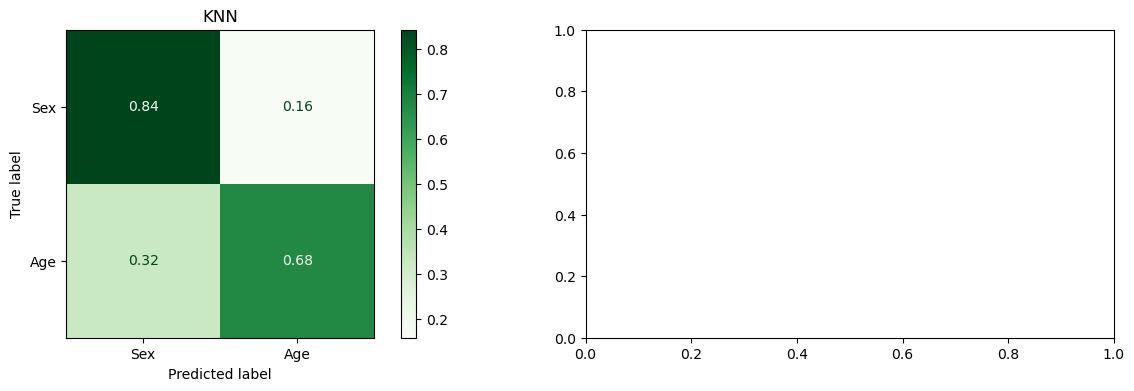

In [239]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


fig, ax = plt.subplots(1,2, figsize = (15,4))

y_knn_train = knn_clf.predict(Xs_train)
y_knn_test = knn_clf.predict(Xs_test)

disp = ConfusionMatrixDisplay.from_predictions(y_train, y_knn_train, display_labels = ['Sex', 'Age'], 
                                               normalize = 'true', 
                                               cmap = 'Greens',
                                               ax = ax[0])
ax[0].set_title('KNN')

#### **Questions**

How does the model performance on the test data compare to the performance on the training data? 
 
 - 


Which models did you fit and which worked better?
 
 - 

In [ ]:

The model performed better on the test data but the values of the scatter plot are unclear.

In [ ]:
I fit the KNN model with the Decision tree model. I would say the decision tree model worked better. 